<a href="https://colab.research.google.com/github/achintya09/CODSOFT/blob/main/task%205/CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CREDIT CARD FRAUD DETECTION PROJECT

## PROJECT INTRODUCTION
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
It contains only numerical input variables which are the result of a PCA transformation.

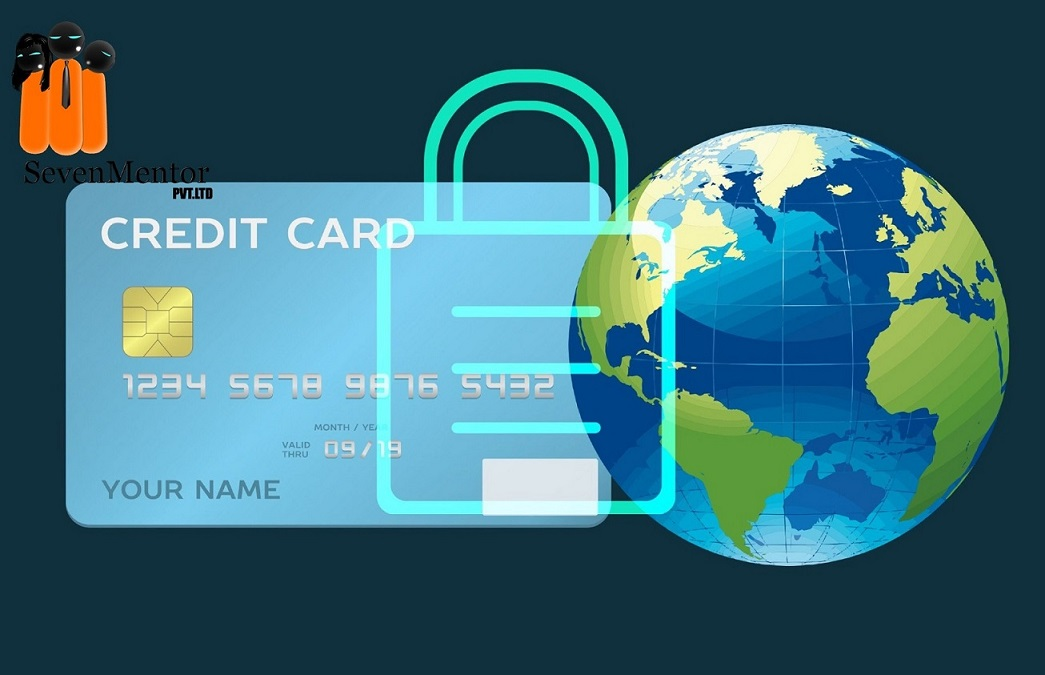

## PROBLEM STATEMENT
* To Build a machine learning model to identify fraudulent credit card
transactions.
* Preprocessing and normalizing the transaction data, handle class
imbalance issues, and split the dataset into training and testing sets.
* To Train a classification algorithm, such as logistic regression or random
forests, to classify transactions as fraudulent or genuine.
* To Evaluate the model's performance using metrics like precision, recall,
and F1-score, and to consider techniques like oversampling or
undersampling for improving results.

## ADDRESSING THE PROBLEM
* I am intend to use under-sampling to handle the imbalance class.
* I checked accuracy score of various classification model and found decision tree and random forest performing best among all.
* Here I intend to use Logistic Decision Tree to prepare the model.

## GETTING STARTED

###IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('creditcard.csv', low_memory=False)

In [ ]:
dataset.shape

(284807, 31)

In [ ]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### SPLITTING THE FEATURES AND TARGET COLUMN OF THE DATASET

In [ ]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### UNDER SAMPLING TO HANDLE IMBALANCE CLASS

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(sampling_strategy=  0.1, random_state= 42)
new_x, new_y = under_sampler.fit_resample(x, y)

In [ ]:
new_x.shape

(5412, 30)

In [ ]:
new_y.shape

(5412,)

### SPLITTING DATASET INTO TRAIN & TEST SET

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_x,new_y, test_size= 0.1, random_state= 42)

### FEATURE SCALING

In [ ]:
from sklearn.preprocessing import  StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

### TRAINING THE TRAINING SET WITH RANDOM FOREST MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators= 50, criterion= 'entropy',  random_state= 42)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

### PREDICTING AND COMPARING ORIGINAL AND PREDICTED RESULT

In [ ]:
y_pred = classifier.predict(x_test)
result = np.concatenate((y_test.reshape(len(y_test),1), y_pred.reshape(len(y_test),1)),1)
print(result)

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### CHECKING CONFUSION MATRIX

In [ ]:
from sklearn.metrics import confusion_matrix

print("confusion matrix:")
print(confusion_matrix(y_test, y_pred))

confusion matrix:
[[493   0]
 [ 10  39]]


### SHOWING VARIOUS METRICS TO CHECK THE MODELS PERFORMANCE

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Recall Score:".ljust(18), round(recall_score(y_test, y_pred),3))
print("Precision Score:".ljust(18), round(precision_score(y_test, y_pred),3))
print("F1 Score:".ljust(18), round(f1_score(y_test, y_pred),3))
print("Accuracy Score:".ljust(18), round(accuracy_score(y_test, y_pred),3))

Recall Score:      0.796
Precision Score:   1.0
F1 Score:          0.886
Accuracy Score:    0.982
